Simulate the predator-prey equations below (these are a more realistic version of the Lokta-Volterra equations)
$$
\frac{dx}{dt} = x(1-x) - \frac{axy}{d+x} \\
\frac{dy}{dt} = by(1 - \frac{y}{x})
$$
for a=1, d=0.1, and b∈[0.1,0.5]

1.1 What behaviour do you see in the long-time limit?

    1.1.1 What happens for b > 0.26?

    1.1.2 What happens for b < 0.26?

1.2 Isolate a periodic orbit. What are its starting conditions? What is its period?

1.3 This will provide testing data for your numerical methods.



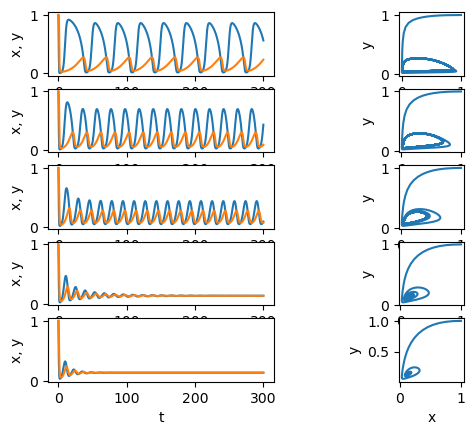

In [1]:
# Numerical shooting worksheet: Evolutionary prototyping
import numpy as np
import matplotlib.pyplot as plt

from Helpers.solvers import solve_to

# Define ODE
def fun(t, y, a=1, d=0.1, b=0.1):
    x = y[0]
    y = y[1]
    return np.array([x*(1-x) - (a*x*y)/(d+x), b*y*(1 - y/x)])

t0 = 0
y0 = np.array([1, 1])
t_max = 300
deltat_max = 0.1

# Solve ODE
timeSeries = []
b_args = [0.1, 0.2, 0.3, 0.4, 0.5]
for b in b_args:
    timeSeries.append(solve_to(fun, t0, y0, t_max=t_max, method='RK4', deltat_max=deltat_max, args=(1.5, 0.1, b)))

# Plot results: subplot for each b
fig, axs = plt.subplots(len(b_args), 2)

for i, b in enumerate(b_args):
    # Plot x(t), y(t) on the left. Plot dy/dx on the right.
    axs[i, 0].plot(timeSeries[i][0], timeSeries[i][1][:, 0], label='b = {} \nx(t)'.format(b))
    axs[i, 0].plot(timeSeries[i][0], timeSeries[i][1][:, 1], label='y(t)')
    axs[i, 0].set_xlabel('t')
    axs[i, 0].set_ylabel('x, y')

    axs[i, 1].plot(timeSeries[i][1][:, 0], timeSeries[i][1][:, 1], label='b = {} \ndy/dx'.format(b))
    axs[i, 1].set_aspect('equal')
    axs[i, 1].set_xlabel('x')
    axs[i, 1].set_ylabel('y')
plt.show()

In long term, a stable periodic orbit is formed if b<0.26. If b>0.26, the system will converge to fixed population sizes.

In [56]:
# Define ODE
def fun(t, y, a=1, d=0.1, b=0.15):
    x = y[0]
    y = y[1]
    return np.array([x*(1-x) - (a*x*y)/(d+x), b*y*(1 - y/x)])

def dy_dt(t, y, b=0.15):
    x = y[:,0]
    y = y[:,1]
    return [x*(1-x) - (a*x*y)/(d+x), b*y*(1 - y/x)]

a = 1
d = 0.1
b = 0.15

t0 = 0
v0 = 0.1
step = 0.01
dy_target = 0

# Initial guess
y0 = np.array([1, v0])
deltat_max = 0.1
t_max = 60

# Periodic orbit: b = 0.15
t, y_ = solve_to(fun, t0, y0, t_max=t_max, method='RK4', deltat_max=deltat_max, args=(1, 0.1, 0.15))
deltas = dy_dt(t, y_)
print(deltas[1])

# while np.round(dy[-1], 2) != dy_target:
#     # Adjust v0 proportional to the difference between the target and the current value
#     v0 += step
#     y0 = np.array([1, v0])
#     t, y_ = solve_to(fun, t0, y0, t_max=t_max, method='RK4', deltat_max=deltat_max, args=(1, 0.1, 0.15))
#     dy = dy_dt(t, y_)


#     plt.plot(t, y_, label='v0 = {}'.format(v0))

# plt.xlabel('t')
# plt.ylabel('y')
# plt.grid()
# # plt.legend()
# print('Final guess: v0 = {}, dy/dx = {}'.format(v0, dy[-1]))
# plt.show()

[ 1.35000000e-02  1.36490771e-02  1.37995551e-02  1.39513951e-02
  1.41045586e-02  1.42590074e-02  1.44147033e-02  1.45716083e-02
  1.47296841e-02  1.48888922e-02  1.50491940e-02  1.52105503e-02
  1.53729215e-02  1.55362673e-02  1.57005471e-02  1.58657191e-02
  1.60317411e-02  1.61985697e-02  1.63661607e-02  1.65344690e-02
  1.67034482e-02  1.68730507e-02  1.70432280e-02  1.72139300e-02
  1.73851054e-02  1.75567014e-02  1.77286638e-02  1.79009370e-02
  1.80734635e-02  1.82461845e-02  1.84190393e-02  1.85919655e-02
  1.87648989e-02  1.89377735e-02  1.91105214e-02  1.92830725e-02
  1.94553550e-02  1.96272949e-02  1.97988160e-02  1.99698402e-02
  2.01402869e-02  2.03100734e-02  2.04791146e-02  2.06473232e-02
  2.08146092e-02  2.09808806e-02  2.11460424e-02  2.13099975e-02
  2.14726458e-02  2.16338850e-02  2.17936098e-02  2.19517123e-02
  2.21080819e-02  2.22626050e-02  2.24151654e-02  2.25656439e-02
  2.27139184e-02  2.28598639e-02  2.30033522e-02  2.31442523e-02
  2.32824301e-02  2.34177

Initial guess: y0 = [1.  0.5], dy/dt = 0.01274443573462733
y0 = [1.01274444 0.5       ], dy/dt = 0.012501440782776124, v0 = 1.0127444357346274
y0 = [1.02524588 0.5       ], dy/dt = 0.012271282940273291, v0 = 1.0252458765174035
y0 = [1.03751716 0.5       ], dy/dt = 0.01205288467500322, v0 = 1.0375171594576769
y0 = [1.04957004 0.5       ], dy/dt = 0.011845289902010649, v0 = 1.04957004413268
y0 = [1.06141533 0.5       ], dy/dt = 0.011647647052230287, v0 = 1.0614153340346908
y0 = [1.07306298 0.5       ], dy/dt = 0.011459194922523362, v0 = 1.073062981086921
y0 = [1.08452218 0.5       ], dy/dt = 0.011279250785581521, v0 = 1.0845221760094443
y0 = [1.09580143 0.5       ], dy/dt = 0.011107200347392661, v0 = 1.0958014267950258
y0 = [1.10690863 0.5       ], dy/dt = 0.010942489223929555, v0 = 1.1069086271424184
y0 = [1.11785112 0.5       ], dy/dt = 0.010784615673988293, v0 = 1.117851116366348
y0 = [1.12863573 0.5       ], dy/dt = 0.01063312437606749, v0 = 1.1286357320403364
y0 = [1.13926886 0.5   

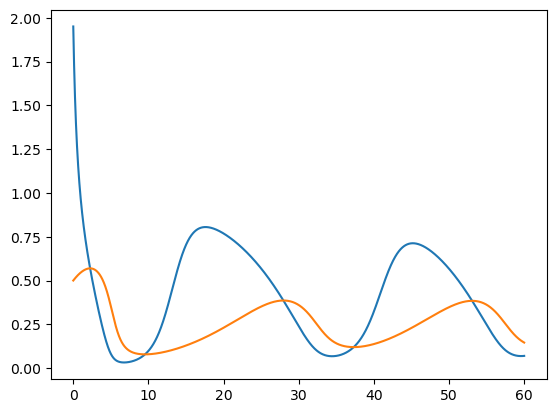

In [63]:
y0 = np.array([1, 0.5])
def dy_dt(t, y, b=0.15):
    x = y[:,0]
    y = y[:,1]
    return [x*(1-x) - (a*x*y)/(d+x), b*y*(1 - y/x)]
    
t, y_ = shooting(fun, dy_dt, t0, y0, y_step=1, yn=0, t_max=60)
plt.plot(t, y_)